https://www.kaggle.com/amiiiney/price-prediction-top-15-regularization-stacking


https://www.kaggle.com/vaibhavsxn/house-price-predictions-using-pca#Modeling-&-Evaluation



REFERENCES

In [0]:
import numpy as np # linear algebra
import pandas as pd #data processing ,CSV file
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

**I name my datasets using alphabets**

In [0]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')

**This is the train data that we have to deal with it**

In [0]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Our test set has 1 feature less than training set , so the SalePrice column is the target that we have to predict**

In [0]:
print('the shape of our training set:', a.shape[0], 'houses', 'and', a.shape[1], 'features')
print('the shape of our test set', b.shape[0], 'houses', 'and', b.shape[1], 'features')

the shape of our training set: 1460 houses and 81 features
the shape of our test set 1459 houses and 80 features


**This is a correlation between numerical features and the target SalePrice**

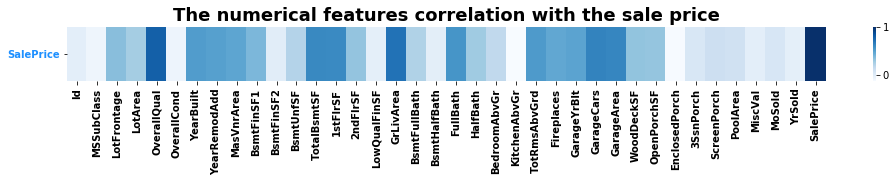

In [0]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f, ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title('The numerical features correlation with the sale price', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

**We sort the features according to their correlation with th sale price**

In [0]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette('cyan', as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


**We see that the overall quality,living area,basement area,garage cars and garage area have the highest correlation values price.**

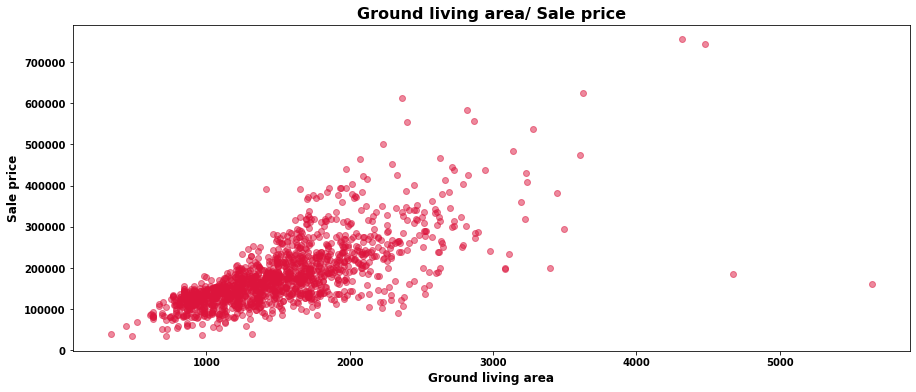

In [0]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color='crimson', alpha=0.5)
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

**Here is a graph that our missing values are displayed and we decided that the columns that have 90% and more we added a red line to show that the columns with 90% will be dropped.**

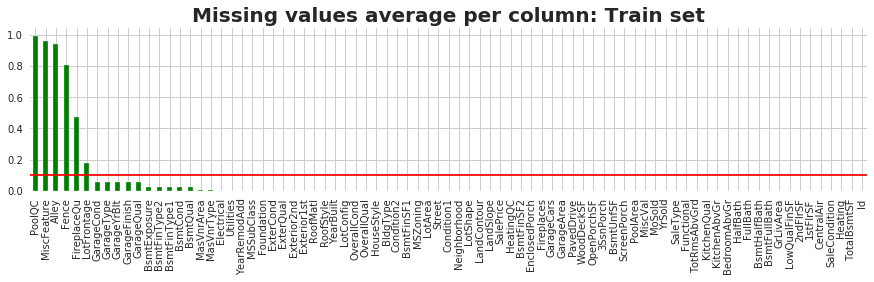

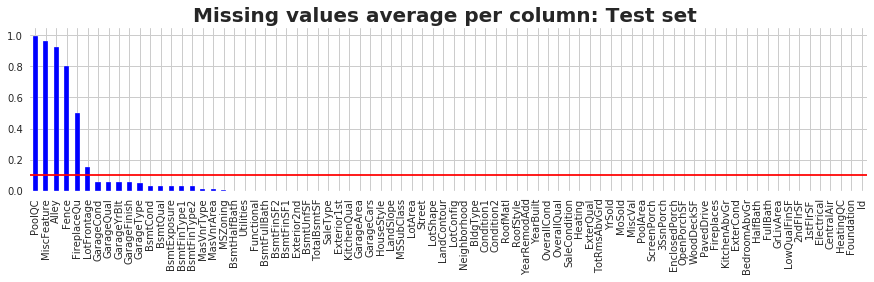

In [0]:

plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0,figsize=(15,3))

a.isnull().mean().sort_values(ascending=False).plot.bar(color='green')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column: Train set', fontsize=20, weight='bold' )
plt.show()

plt.subplots(1,0,figsize=(15,3))
b.isnull().mean().sort_values(ascending=False).plot.bar(color='blue')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column: Test set ', fontsize=20, weight='bold' )
plt.show()

**There is a combination between train and test datasets**

In [0]:
#We combine the train and test datasets 
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()
c1 = pd.concat((a,b), sort=False).reset_index(drop=True)
#Combine train and test sets
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print('Total size is:', c1.shape)

Total size is: (2919, 79)


**We are getting rid with the values that they have most in their columns null
values by using a drop method**

In [0]:
c=c1.dropna(thresh=len(c1)*0.9, axis=1)
print('We dropped',c1.shape[1]-c.shape[1], 'features in the combined set')

We dropped 6 features in the combined set


**Here we show the features of the missing values, some features they are missing 1 with 2 values so we will try to fill them with the fill method**

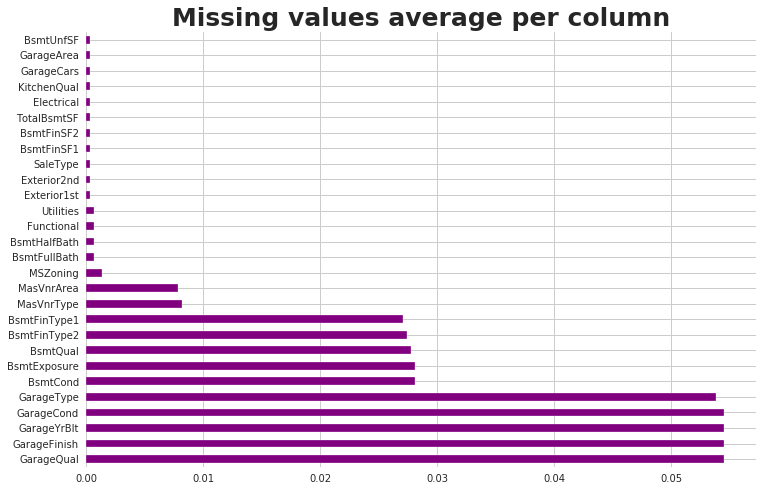

In [0]:
allna = (c.isnull().sum() / len(c))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()

In [0]:
print('The shape of the combined dataset after dropping features with more than 90% ', c.shape)

The shape of the combined dataset after dropping features with more than 90%  (2919, 73)


**We isolate the missing values from the rest of the data set we can handle better how to treat them**

In [0]:
NA=c[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

**now we split them to categorical and to numerical features**

In [0]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('we have:',NAcat.shape[1], 'categorical features with missing values')
print('we have:', NAnum.shape[1], 'numerical features with missing values')

we have: 18 categorical features with missing values
we have: 10 numerical features with missing values


**We start with the numerical features so we just looking the columns to see what we need to fix**

In [0]:
NAnum.head()

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [0]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)
#For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
#We will fill with 0s because they just mean that the hosue doesn't have a basement, bathrooms or a garage

**Now we handle with the 19 categorical features**

In [0]:
NAcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


**Now we will check in each column what is missing**

In [0]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("red", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


**We start with features hacing just few missing value, using the fill method**

In [0]:
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')

**We fill with 0 numerical features and None in categorical** 

In [0]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")
#numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [0]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
TotalBsmtSF      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

**Since are is important variable we create a new freature  as 'TotalArea' that sums the area of all the floors and the basement**

In [0]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2

In [0]:
#Handling with numerical features
#we convert Month Sold feature to categorical
c['MoSold'] = c['MoSold'].astype(str)
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

In [0]:
cb = pd.get_dummies(c)
print('the shape of the original dataset',c.shape)
print('the shape of the encoded dataset',cb.shape)
print('now we have',cb.shape[1]-c.shape[1],'new encoded features')


the shape of the original dataset (2919, 76)
the shape of the encoded dataset (2919, 311)
now we have 235 new encoded features


In [0]:
#here we show for better understanding the skewness and kurtosis 
#so it will show the difference between the before and after
#Skewness it measures the lack of symmetry in data distribution.
#kurtosis it is used to describe extreme values in one versus the other tail.

print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())


Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [0]:
from scipy.stats import skew

numeric_feats = c.dtypes[c.dtypes != "object"].index

skewed_feats = c[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

c[skewed_feats] = np.log1p(c[skewed_feats])

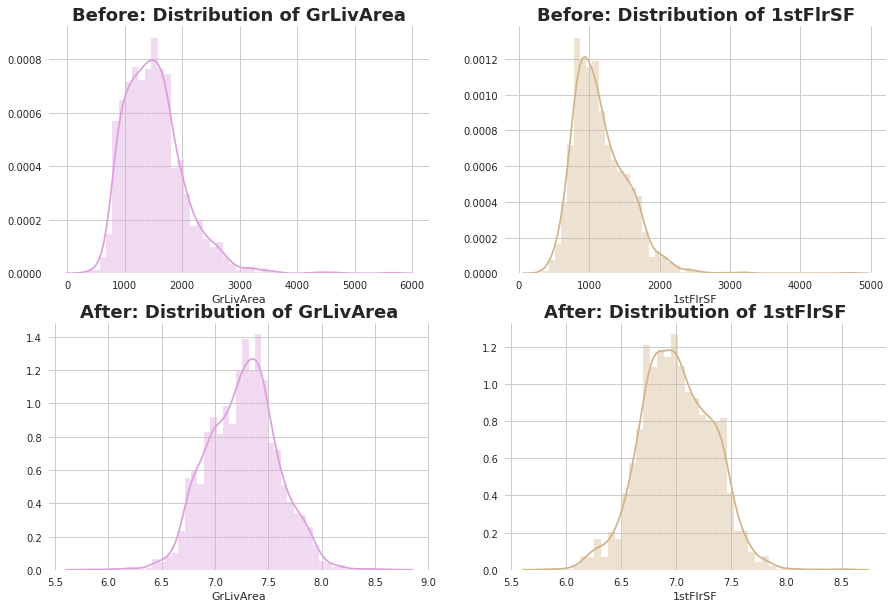

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(a.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(a['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(c.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(c['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

In [0]:
#here  is skewness after using methods
print('Skewness after log transform:', c['GrLivArea'].skew())
print('Kurtosis after log transform:', c['GrLivArea'].kurt())

Skewness after log transform: 0.013194362973261277
Kurtosis after log transform: 0.21187007351190523


In [0]:
#after we cleaned the missing values, now we split the combined data sets  to the original train and test sets
Train = cb[:na] #na is the number of rows of the original training set
Test = cb[na:]

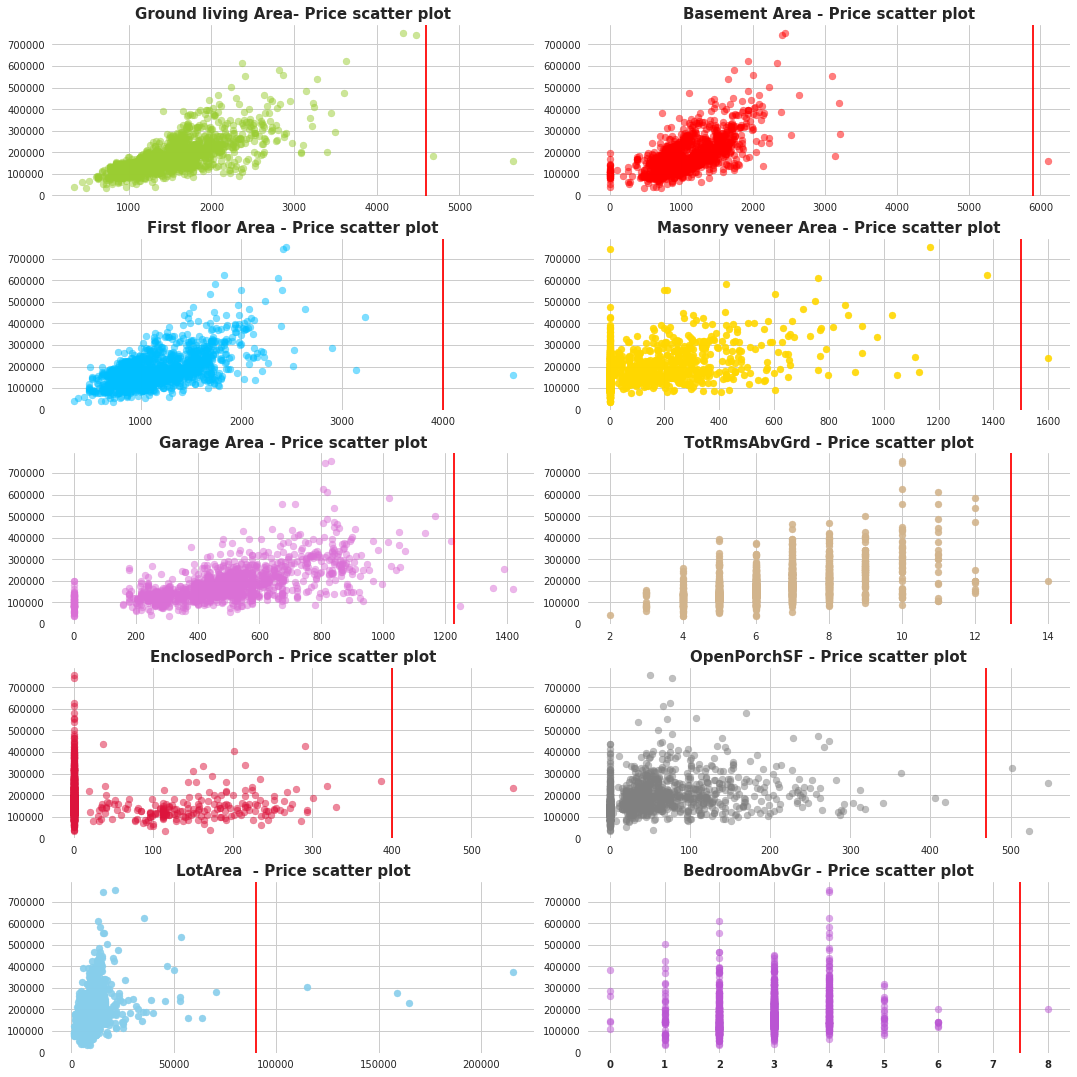

In [0]:
# Outliers detection
#outliers visualization

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((5,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(3,0))
plt.scatter(x=a['EnclosedPorch'], y=a['SalePrice'], color=('crimson'),alpha=0.5)
plt.axvline(x=400, color='r', linestyle='-')
plt.title('EnclosedPorch - Price scatter plot', fontsize=15, weight='bold' )


ax1 = plt.subplot2grid((5,2),(3,1))
plt.scatter(x=a['OpenPorchSF'], y=a['SalePrice'], color=('gray'),alpha=0.5)
plt.axvline(x=470, color='r', linestyle='-')
plt.title('OpenPorchSF - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(4,0))
plt.scatter(x=a['LotArea'], y=a['SalePrice'], color=('skyblue'),alpha=0.9)
plt.axvline(x=90000, color='r', linestyle='-')
plt.title('LotArea  - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(4,1))
plt.scatter(x=a['BedroomAbvGr'], y=a['SalePrice'], color=('mediumorchid'),alpha=0.5)
plt.axvline(x=7.5, color='r', linestyle='-')
plt.title('BedroomAbvGr - Price scatter plot', fontsize=15, weight='bold' )
plt.tight_layout(0.85)
plt.xticks(weight='bold')
plt.show()


In [0]:
a['GrLivArea'].sort_values(ascending=False).head(2)
#we are sorting the columns  containing the outliers shown in the graph

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [0]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [0]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [0]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [0]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [0]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

In [0]:
a['EnclosedPorch'].sort_values(ascending=False).head(1)

197    552
Name: EnclosedPorch, dtype: int64

In [0]:
a['OpenPorchSF'].sort_values(ascending=False).head(3)

1328    547
495     523
583     502
Name: OpenPorchSF, dtype: int64

In [0]:
a['LotArea'].sort_values(ascending=False).head(4)

313    215245
335    164660
249    159000
706    115149
Name: LotArea, dtype: int64

In [0]:
a['BedroomAbvGr'].sort_values(ascending=False).head(1)

635    8
Name: BedroomAbvGr, dtype: int64

In [0]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

In [0]:
#Here we remove those points 
print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


In [0]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [0]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [0]:
#pos = [1298,523, 297, 581, 1190, 1061, 635, 197,1328, 495, 583, 313, 335, 249, 706]
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)
#we didn't drop all the outliers for a better RSME score

In [0]:

print('Making sure that both train and target sets have the same wor number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

Making sure that both train and target sets have the same wor number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


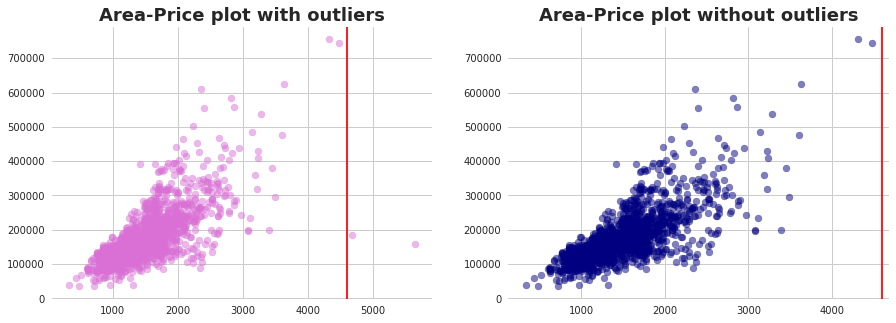

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

In [0]:
print("Skewness before log transform: "), target['SalePrice'].skew()
print("Kurtosis before log transform: "),target['SalePrice'].kurt()

Skewness before log transform: 
Kurtosis before log transform: 


(None, 6.527120338179705)

In [0]:
#log transform the target
target['SalePrice'] = np.log1p(target['SalePrice'])

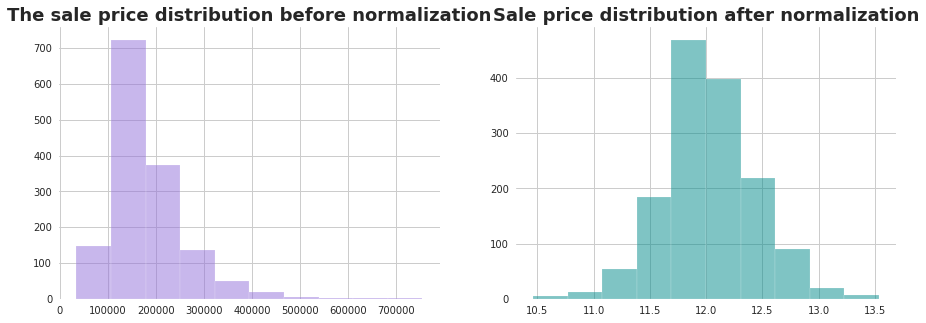

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('The sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [0]:
print('skeweness after log transform:'), target['SalePrice'].skew()
print('kurtosis after log transform: '), target['SalePrice'].kurt()

skeweness after log transform:
kurtosis after log transform: 


(None, 0.8062416349541652)

**Machine Learning- Using the algorithms to take a more precise score**

In [0]:
#we set the machine learning  by setting the features and the target
x = train
y=np.array(target)

In [0]:
#we split the train data set and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = .33, random_state = 0)

In [0]:
#we use  robustscaler to scale our data and is very good against outliers 
#we use it because it removes the median scale the data according to the quantile range.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
# transform x_train
x_train = scaler.fit_transform(x_train)
#trnasform x_test
x_test = scaler.fit_transform(x_test)
#transform test set
X_test = scaler.transform(Test)

In [0]:
#we used linear regression because it is used to determine the extent to which to which there is a linear relationship between depndent variable and one or more independent variables.
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-15352743.066996086
RMSE = 3918.2576570455503


In [0]:
#Ridge regression
#we used that technique because is used for analyzing regression data that suffer from multicollinearity.
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",math.sqrt(-ridge_reg.best_score_))

The best value of Alpha is:  {'alpha': 19}
The best score achieved with Alpha=14 is:  0.11467931046981122


In [0]:
ridge_mod=Ridge(alpha=19)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.09429429887448268
Root Mean Square Error test = 0.11658694977628466


In [0]:
#lasso its something similar with the ridge method the only difference is that tends to have a lot of entries of 0 entries.
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0009}


In [0]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.09925203336767814
Root Mean Square Error test = 0.11128906069857655


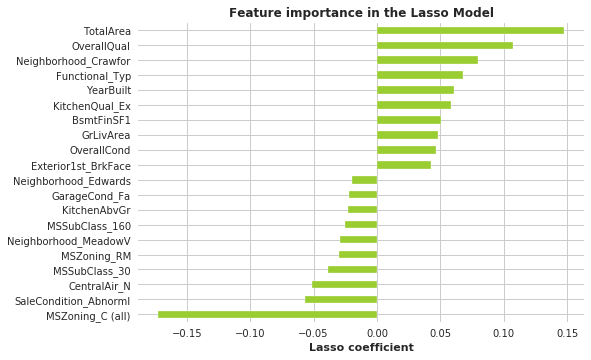

In [0]:
#we checked the important features that our model used to make predictions.
#and here we see that the most important features is the TotalArea.
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [0]:

print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  87 important features and dropped the other  224  features


In [0]:
#here is a technique of ElasticNet that is used to combine ridge and Lasso,we used cross validation to find the alpha, and the ratio between ridge and lasso for a better combination of both.
from sklearn.linear_model import ElasticNetCV

alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test = 0.11295166303290012
0.000542555


In [0]:
from xgboost.sklearn import XGBRegressor



In [0]:
#Here is a method of XGBoost that is an implementation of gradient boosted decision trees designed for speed  and perfomance
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.12055152482643988


In [0]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.11036074084576938


In [0]:
#stacking regressor so we can stack all the previous models, including the voting regressor as the meta regressor.
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.11356569963322345


In [0]:
final_test=(0.2*vote_pred+0.6*stacking_pred+ 0.2*y_lasso_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))

Root Mean Square Error test = 0.11000559731710051


In [0]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)


In [0]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.6*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission2.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,120997.312601
1,1462,156012.214811
2,1463,177042.960030
3,1464,194421.620753
4,1465,188192.651107
